In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(100,)


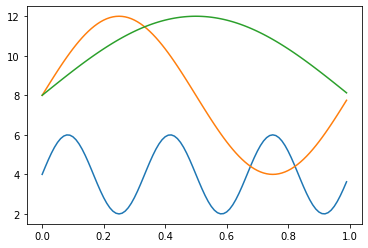

In [3]:
# Function to Learn
kvec = np.arange(0,1,0.01)
print(kvec.shape)

def func(a,b):
    
    return a * (2 + np.sin(2*np.pi*b*kvec) )

plt.plot(kvec, func(2,3))
plt.plot(kvec, func(4,1))
plt.plot(kvec, func(4,0.5))

In [4]:
# Training Set
Avec = np.arange(1,2,0.01)
Bvec = np.arange(1,2,0.01)

Agrid, Bgrid = np.meshgrid(Avec,Bvec)
Atrain, Btrain = Agrid.flatten(), Bgrid.flatten()
Ptrain = np.vstack( (Atrain,Btrain) )

Ftrain = [ func(Atrain[ii],Btrain[ii]) for ii in range(len(Atrain)) ]
Ftrain = np.array(Ftrain)

In [5]:
# Set up architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),\
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(kvec))
])

In [6]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [7]:
nepoch = 128
nbatch = 16
model.fit(Ptrain.T,Ftrain,epochs=nepoch,batch_size=nbatch)

Epoch 1/128
625/625 [==============================] - 1s 2ms/step - loss: 0.7444 - mse: 0.7444
Epoch 2/128
625/625 [==============================] - 1s 2ms/step - loss: 0.1438 - mse: 0.1438
Epoch 3/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0401 - mse: 0.0401
Epoch 4/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0211 - mse: 0.0211
Epoch 5/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0113 - mse: 0.0113
Epoch 6/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057
Epoch 7/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 8/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 9/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 10/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 11/128
625/625 [=================

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  768       
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dense_2 (Dense)              multiple                  25700     
Total params: 92,260
Trainable params: 92,260
Non-trainable params: 0
_________________________________________________________________


In [16]:
a, b = 1.9, 1.2

Xtest = np.array([a,b])[None,:]
Yreal = func(a,b)

Ylearn = model.predict(Xtest)[0,:]
abserr = np.max(np.abs(Ylearn-Yreal))
maxloc = np.argmax(np.abs(Ylearn-Yreal))
print("Max.abs.error ",abserr," at x=",kvec[maxloc])

Max.abs.error  0.017928488645891028  at x= 0.59


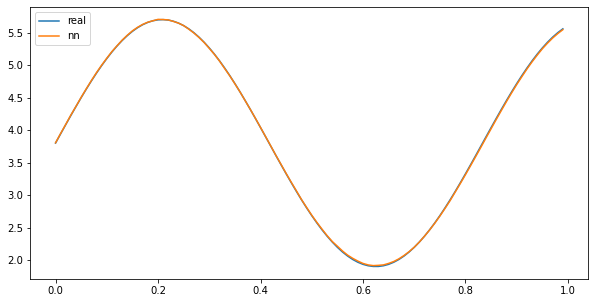

In [17]:
plt.figure(figsize=(10,5))

plt.plot(kvec, Yreal, label='real')
plt.plot(kvec, Ylearn, label='nn')

plt.legend()

No handles with labels found to put in legend.


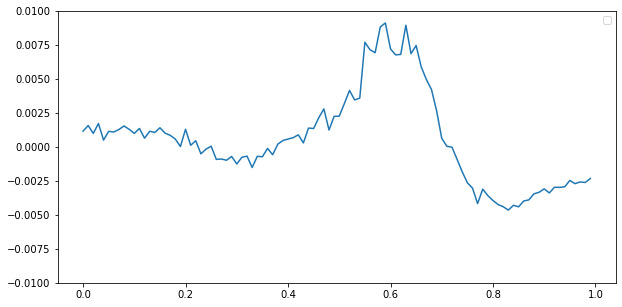

In [18]:
plt.figure(figsize=(10,5))

plt.plot(kvec, Ylearn/Yreal - 1)
plt.ylim(-0.01,0.01)

plt.legend()

In [33]:
# Now try the same thing using subclassing
class Emulator(tf.keras.Model):
    def __init__(self):
        super(Emulator, self).__init__()
        # define all layers in init
        # Block 1
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        
        # Block 2
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        
        # Block 3
        self.dense3 = tf.keras.layers.Dense(len(kvec))


    def call(self, input_tensor, training=False):
        # forward pass: block 1 
        x = self.dense1(input_tensor)
        
        # forward pass: block 2
        x = self.dense2(x)

        # droput followed by gap and classifier
        x = self.dense3(x)

        return x

In [34]:
emulator = Emulator()
emulator.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [35]:
emulator.fit(Ptrain.T,Ftrain,epochs=nepoch,batch_size=nbatch)

Epoch 1/128
625/625 [==============================] - 1s 2ms/step - loss: 0.7248 - mse: 0.7248
Epoch 2/128
625/625 [==============================] - 1s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 3/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0350 - mse: 0.0350
Epoch 4/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0183 - mse: 0.0183
Epoch 5/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0102 - mse: 0.0102
Epoch 6/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 7/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 8/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 9/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 10/128
625/625 [==============================] - 1s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 11/128
625/625 [=================

In [38]:
emulator.summary()

Model: "emulator_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  768       
_________________________________________________________________
dense_13 (Dense)             multiple                  65792     
_________________________________________________________________
dense_14 (Dense)             multiple                  25700     
Total params: 92,260
Trainable params: 92,260
Non-trainable params: 0
_________________________________________________________________


In [39]:
a, b = 1.9, 1.2

Xtest = np.array([a,b])[None,:]
Yreal = func(a,b)

Ylearn = emulator.predict(Xtest)[0,:]
abserr = np.max(np.abs(Ylearn-Yreal))
maxloc = np.argmax(np.abs(Ylearn-Yreal))
print("Max.abs.error ",abserr," at x=",kvec[maxloc])

Max.abs.error  0.0693350422440222  at x= 0.99


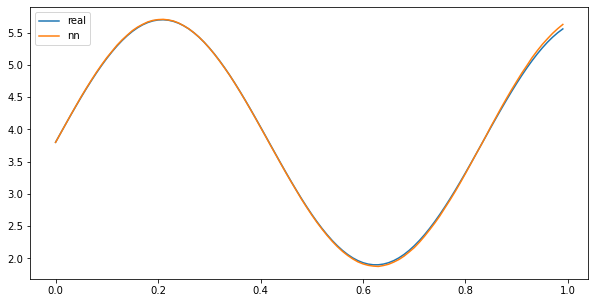

In [40]:
plt.figure(figsize=(10,5))

plt.plot(kvec, Yreal, label='real')
plt.plot(kvec, Ylearn, label='nn')

plt.legend()

In [41]:
len(kvec)

100

In [115]:
# Now try a custom activation using Alsing et al 2020
# https://github.com/justinalsing/speculator/blob/master/speculator/speculator.py

class Emulator(tf.keras.Model):
    
    def __init__(self):
        super(Emulator, self).__init__()
        
        trainable = True
        
        self.n_parameters = 2
        self.n_hidden = [100,100,100]
        self.nks = 100
        
        self.architecture = [self.n_parameters] + self.n_hidden + [self.nks]
        self.n_layers = len(self.architecture) - 1

        self.W = []
        self.b = []
        self.alphas = []
        self.betas = [] 
        
        for i in range(self.n_layers):
            self.W.append(tf.Variable(tf.random.normal([self.architecture[i], self.architecture[i+1]], 0., np.sqrt(2./self.n_parameters)), name="W_" + str(i), trainable=trainable))
            self.b.append(tf.Variable(tf.zeros([self.architecture[i+1]]), name = "b_" + str(i), trainable=trainable))
        for i in range(self.n_layers-1):
            self.alphas.append(tf.Variable(tf.random.normal([self.architecture[i+1]]), name = "alphas_" + str(i), trainable=trainable))
            self.betas.append(tf.Variable(tf.random.normal([self.architecture[i+1]]), name = "betas_" + str(i), trainable=trainable))
            
    def activation(self, x, alpha, beta):
        return tf.multiply(tf.add(beta, tf.multiply(tf.sigmoid(tf.multiply(alpha, x)), tf.subtract(1.0, beta)) ), x)
    
    @tf.function
    def call(self, parameters):
        
        outputs = []
        #layers = [tf.divide(tf.subtract(parameters, self.parameters_shift), self.parameters_scale)]
        
        x = parameters
        
        for i in range(self.n_layers - 1):
            
            # linear network operation
            x = tf.add(tf.matmul(x, self.W[i]), self.b[i])
            
            # non-linear activation function
            x = self.activation(x, self.alphas[i], self.betas[i])

        # linear output layer
        x = tf.add(tf.matmul(x, self.W[-1]), self.b[-1])

        return x

In [116]:
emulator = Emulator()
emulator.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [130]:
emulator.optimizer.lr = 0.001
nbatch = 64
emulator.fit(Ptrain.T,Ftrain,epochs=128,batch_size=nbatch)

Epoch 1/128
157/157 [==============================] - 1s 4ms/step - loss: 7.0411e-07 - mse: 7.0411e-07
Epoch 2/128
157/157 [==============================] - 1s 4ms/step - loss: 1.6397e-07 - mse: 1.6397e-07
Epoch 3/128
157/157 [==============================] - 1s 4ms/step - loss: 1.7588e-07 - mse: 1.7588e-07
Epoch 4/128
157/157 [==============================] - 1s 3ms/step - loss: 1.8052e-07 - mse: 1.8052e-07
Epoch 5/128
157/157 [==============================] - 1s 3ms/step - loss: 1.6598e-07 - mse: 1.6598e-07
Epoch 6/128
157/157 [==============================] - 1s 3ms/step - loss: 1.8279e-07 - mse: 1.8279e-07
Epoch 7/128
157/157 [==============================] - 1s 4ms/step - loss: 2.3392e-07 - mse: 2.3392e-07
Epoch 8/128
157/157 [==============================] - 1s 3ms/step - loss: 2.7376e-07 - mse: 2.7376e-07
Epoch 9/128
157/157 [==============================] - 1s 4ms/step - loss: 4.6281e-07 - mse: 4.6281e-07
Epoch 10/128
157/157 [==============================] - 1s 4ms/s

In [133]:
a, b = 1.453, 1.781

Xtest = np.array([a,b])[None,:]
Yreal = func(a,b)

Ylearn = emulator.predict(Xtest)[0,:]
abserr = np.max(np.abs(Ylearn-Yreal))
maxloc = np.argmax(np.abs(Ylearn-Yreal))
print("Max.abs.error ",abserr," at x=",kvec[maxloc])

Max.abs.error  0.0014829760161259031  at x= 0.8


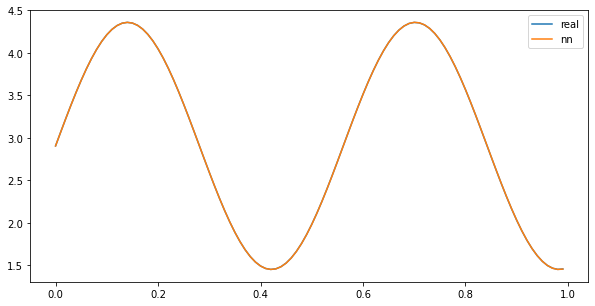

In [134]:
plt.figure(figsize=(10,5))

plt.plot(kvec, Yreal, label='real')
plt.plot(kvec, Ylearn, label='nn')

plt.legend()

No handles with labels found to put in legend.


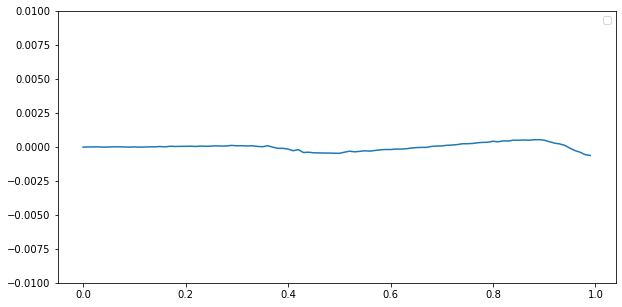

In [135]:
plt.figure(figsize=(10,5))

plt.plot(kvec, Ylearn/Yreal - 1)
plt.ylim(-0.01,0.01)

plt.legend()

In [161]:
# Now let's add add early stopping based on validation loss# Training Set
Avec = np.arange(1,2,0.01)
Bvec = np.arange(1,2,0.01)

Agrid, Bgrid = np.meshgrid(Avec,Bvec)
Atrain, Btrain = Agrid.flatten(), Bgrid.flatten()
Ptrain = np.vstack( (Atrain,Btrain) ).T

Ftrain = [ func(Atrain[ii],Btrain[ii]) for ii in range(len(Atrain)) ]
Ftrain = np.array(Ftrain)

In [162]:
# randomly select training set and validations set
iis = np.random.rand(len(Atrain)) > 0.3

Pval = Ptrain[~iis,:]
Fval = Ftrain[~iis,:]

Ptrain = Ptrain[iis,:]
Ftrain = Ftrain[iis,:]

In [166]:
emulator.fit(Ptrain,Ftrain,epochs=32,batch_size=16,validation_data=(Pval,Fval))

Epoch 1/32
439/439 [==============================] - 2s 4ms/step - loss: 1.1726e-06 - mse: 1.1726e-06 - val_loss: 3.1698e-06 - val_mse: 3.1698e-06
Epoch 2/32
439/439 [==============================] - 2s 4ms/step - loss: 1.0247e-05 - mse: 1.0247e-05 - val_loss: 2.0237e-06 - val_mse: 2.0237e-06
Epoch 3/32
439/439 [==============================] - 2s 4ms/step - loss: 1.0601e-05 - mse: 1.0601e-05 - val_loss: 3.5942e-05 - val_mse: 3.5942e-05
Epoch 4/32
439/439 [==============================] - 2s 4ms/step - loss: 4.5696e-06 - mse: 4.5696e-06 - val_loss: 4.0065e-06 - val_mse: 4.0065e-06
Epoch 5/32
439/439 [==============================] - 2s 4ms/step - loss: 9.3310e-06 - mse: 9.3310e-06 - val_loss: 3.3694e-06 - val_mse: 3.3694e-06
Epoch 6/32
439/439 [==============================] - 2s 4ms/step - loss: 2.9201e-06 - mse: 2.9201e-06 - val_loss: 5.7504e-06 - val_mse: 5.7504e-06
Epoch 7/32
439/439 [==============================] - 2s 4ms/step - loss: 1.0971e-05 - mse: 1.0971e-05 - val_los

In [171]:
# add in early stop:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
emulator.fit(Ptrain,Ftrain,epochs=32,batch_size=16,validation_data=(Pval,Fval),callbacks=[es])

Epoch 1/32
439/439 [==============================] - 2s 4ms/step - loss: 1.5564e-05 - mse: 1.5564e-05 - val_loss: 1.1592e-06 - val_mse: 1.1592e-06
Epoch 2/32
439/439 [==============================] - 2s 4ms/step - loss: 3.0234e-06 - mse: 3.0234e-06 - val_loss: 4.5054e-06 - val_mse: 4.5054e-06
Epoch 00002: early stopping


In [172]:
a, b = 1.453, 1.781

Xtest = np.array([a,b])[None,:]
Yreal = func(a,b)

Ylearn = emulator.predict(Xtest)[0,:]
abserr = np.max(np.abs(Ylearn-Yreal))
maxloc = np.argmax(np.abs(Ylearn-Yreal))
print("Max.abs.error ",abserr," at x=",kvec[maxloc])

Max.abs.error  0.0058187727277327905  at x= 0.98


No handles with labels found to put in legend.


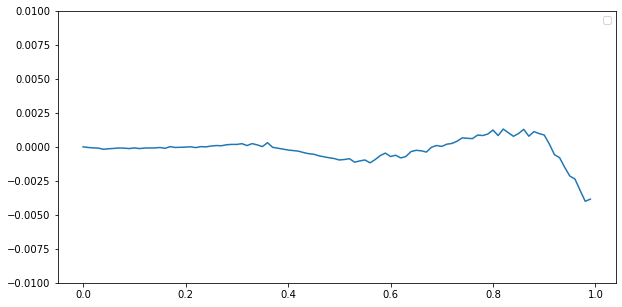

In [173]:
plt.figure(figsize=(10,5))

plt.plot(kvec, Ylearn/Yreal - 1)
plt.ylim(-0.01,0.01)

plt.legend()

In [175]:
# Now try the full prescription:

lrs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
nbatchs = [16, 32, 64, 128, 256]

# These are in the paper... we don't have that many samples
#lrs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
#nbatchs = [1000, 10000, 20000, 30000,40000, 50000]

In [179]:
emulator = Emulator()
emulator.compile(optimizer='adam',loss='mse',metrics=['mse'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

for lr, nbatch in zip(lrs,nbatchs):
    print("Using learning rate, batch size:  %.2e, %d."%(lr,nbatch))
    
    emulator.optimizer.lr = lr
    emulator.fit(Ptrain,Ftrain,epochs=1000,batch_size=nbatch,validation_data=(Pval,Fval),callbacks=[es])
    

Using learning rate, batch size:  1.00e-02, 16.
Epoch 1/1000
439/439 [==============================] - 2s 5ms/step - loss: 16968.5547 - mse: 16968.5547 - val_loss: 77.1816 - val_mse: 77.1816
Epoch 2/1000
439/439 [==============================] - 2s 5ms/step - loss: 46.0595 - mse: 46.0595 - val_loss: 28.4545 - val_mse: 28.4545
Epoch 3/1000
439/439 [==============================] - 2s 4ms/step - loss: 23.3951 - mse: 23.3951 - val_loss: 18.3705 - val_mse: 18.3705
Epoch 4/1000
439/439 [==============================] - 2s 4ms/step - loss: 16.4798 - mse: 16.4798 - val_loss: 23.3453 - val_mse: 23.3453
Epoch 5/1000
439/439 [==============================] - 2s 4ms/step - loss: 19.1573 - mse: 19.1573 - val_loss: 10.1380 - val_mse: 10.1380
Epoch 6/1000
439/439 [==============================] - 2s 4ms/step - loss: 20.2924 - mse: 20.2924 - val_loss: 30.9369 - val_mse: 30.9369
Epoch 7/1000
439/439 [==============================] - 2s 4ms/step - loss: 16.3003 - mse: 16.3003 - val_loss: 7.2668 

In [190]:
a, b = 1.153, 1.881

Xtest = np.array([a,b])[None,:]
Yreal = func(a,b)

Ylearn = emulator.predict(Xtest)[0,:]
abserr = np.max(np.abs(Ylearn-Yreal))
maxloc = np.argmax(np.abs(Ylearn-Yreal))
print("Max.abs.error ",abserr," at x=",kvec[maxloc])

Max.abs.error  0.004820070161716927  at x= 0.59


Text(0.5, 0, 'k')

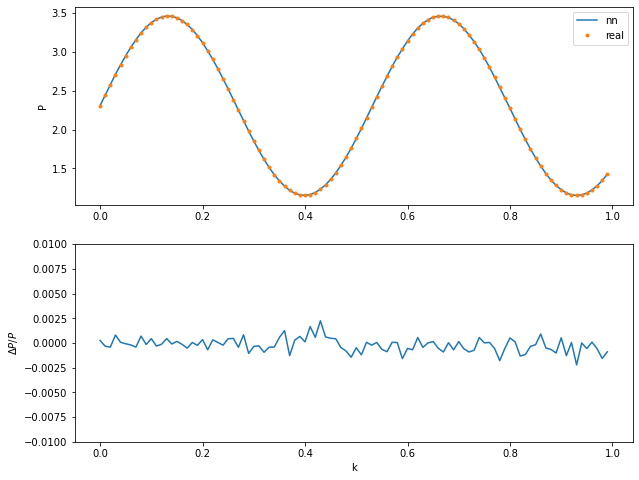

In [191]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(kvec, Ylearn, label='nn')
plt.plot(kvec, Yreal, '.', label='real')

plt.ylabel('P')
plt.legend()

plt.subplot(2,1,2)
plt.plot(kvec, Ylearn/Yreal - 1)
plt.ylim(-0.01,0.01)
plt.ylabel(r'$\Delta P/P$')
plt.xlabel('k')



In [192]:
emulator.summary()

Model: "emulator_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 31,200
Trainable params: 31,200
Non-trainable params: 0
_________________________________________________________________
